## Lesson-07 Recurrent Neural Networks 循环神经网络的原理及应用

循环神经网络是我们常用的一个网络模型，这个网络能够处理例如字符串，时间序列等问题。因为模型对序列问题的优势，RNN模型已经成为了自然语言处理问题的常见方法。

在本课程的作业中，我们将完成三个任务：

0. 基于任务驱动，实际感受并能够初步使用pytorch；
1. 使用RNN模型进行名字的国籍分类；(这个程序主要是参考的Pytorch文档)

RNN也可以用于金融数据的预测，例如:
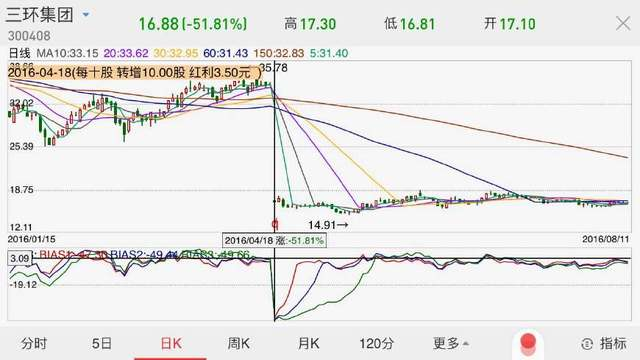

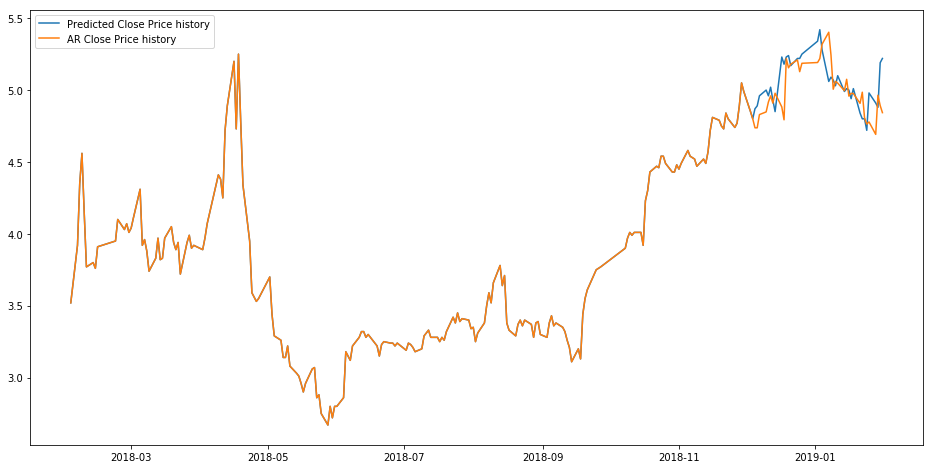

上图中蓝色的部分就是预测值， 关于RNN模型对金融数据的预测，我们只会会增加专门的研讨课程，给大家讲解

我们今天带给大家的是使用RNN进行名字的国籍分类:

## 1. 使用RNN模型进行名字的国籍分类

首先，我们下载数据: 将这个数据置于和我们jupyter notebook位置相同的地方

#### 1.1 我们利用通配符，打印出所有的文件

In [3]:
!pip install matplotlib

     |████████████████████████████████| 12.4 MB 36 kB/s eta 0:00:019
  Using cached pyparsing-2.4.6-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (113 kB)


In [2]:
from io import open
import glob
import os
import matplotlib.pyplot as plt


def find_files(path): return glob.glob(path)

print(find_files('data/names/*.txt'))

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']


### 1.2 名字里边包含不少非Ascii码，为了简便问题，我们将他们转化为Ascii码

In [3]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_2_Ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicode_2_Ascii('Ślusàrski'))

Slusarski


In [4]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [5]:
n_letters

57

### Step1.3 然后我们建立类别和对于的名字的dictionary对应

In [6]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def read_lines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicode_2_Ascii(line) for line in lines]

for filename in find_files('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = read_lines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [7]:
n_categories

18

In [8]:
category_lines['Chinese'][:10]

['Ang', 'AuYong', 'Bai', 'Ban', 'Bao', 'Bei', 'Bian', 'Bui', 'Cai', 'Cao']

### 1.4 这一次我们使用pytorch, 来进行向量化

In [9]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, n_letters)
    print("tensor", tensor)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letter_to_index(letter)] = 1
    return tensor

print(letter_to_index('J'))

print(line_to_tensor('Jones').size())

35
torch.Size([5, 1, 57])


In [10]:
tensor = torch.zeros(1, 10)
print("tensor", tensor)
tensor[0][letter_to_index('a')] = 1
print(tensor)

tensor tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [11]:
line_to_tensor('Jones')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

我们可以看到，是对名字里的每个字符做了 one-hot操作

### 1.5 然后，我们构建一个这样的RNN网络

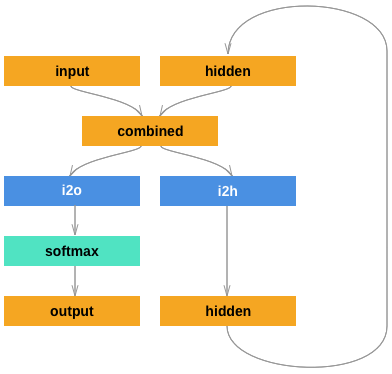

In [12]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        # nn.Linear 全连接层，一个是input的维度，另一个是output的维度
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128

In [13]:
m = torch.nn.Linear(20, 30)  # 20,30是指维度

In [14]:
m

Linear(in_features=20, out_features=30, bias=True)

In [15]:
rnn = RNN(n_letters, n_hidden, n_categories)

### 1.6 运行一步RNN

为了运行这个rnn网络，我们需要给他一个input，然后再加上一个hidden state. 然后我们就能过获得一个output，这个output便是的是这个单词的属于每个国家的概率，和接下来的hidden state.

In [16]:
input = letter_to_tensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

tensor tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [17]:
n_hidden

128

In [18]:
hidden

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
output

tensor([[-2.7880, -2.7617, -2.9117, -2.8808, -2.9181, -2.8497, -2.8759, -2.8473,
         -2.8556, -2.9067, -2.8765, -2.9898, -2.8980, -3.0073, -2.9173, -2.9576,
         -2.8651, -2.9532]], grad_fn=<LogSoftmaxBackward>)

In [20]:
next_hidden

tensor([[-2.4850e-02,  6.5433e-02,  1.3419e-01,  6.2842e-02,  8.7862e-02,
          1.0712e-01,  9.3800e-02,  1.5327e-02, -1.0379e-01,  1.0815e-03,
         -1.7651e-02,  4.2187e-02,  3.9292e-02, -1.8794e-02,  4.6053e-02,
          6.8818e-02, -3.7164e-02,  7.2655e-02, -3.9711e-03, -1.1805e-02,
          2.0365e-02, -1.1556e-01, -8.1031e-02,  9.3311e-05,  1.2629e-02,
         -4.6561e-02, -4.3573e-02,  2.4429e-02,  7.5039e-02,  8.3200e-02,
          1.2353e-01, -8.0617e-03,  2.7043e-02,  5.3525e-02,  1.0650e-01,
         -7.3032e-03, -6.9462e-02, -4.9952e-02, -6.3660e-02, -7.3335e-02,
          4.4181e-02,  8.1327e-02, -1.3975e-03,  1.1237e-01, -3.5186e-02,
          1.0134e-01,  4.0054e-02, -5.8266e-02,  4.2609e-02, -7.4894e-03,
          1.0426e-02,  1.3240e-01, -2.9451e-02, -8.5313e-02,  5.6853e-02,
         -2.2259e-02,  8.1372e-02, -7.8340e-02,  1.4059e-02, -5.2382e-02,
          5.3855e-02, -4.3418e-02,  5.8648e-02,  1.2940e-02,  7.8108e-02,
          6.7229e-02, -9.9370e-03,  7.

然后，我们可以使用 line_to_tensor, 把一句话直接变成 tensor

In [21]:
input = line_to_tensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.7880, -2.7617, -2.9117, -2.8808, -2.9181, -2.8497, -2.8759, -2.8473,
         -2.8556, -2.9067, -2.8765, -2.9898, -2.8980, -3.0073, -2.9173, -2.9576,
         -2.8651, -2.9532]], grad_fn=<LogSoftmaxBackward>)


这个output，就是基于目前的RNN参数，预测出来的国籍概率分布。显然是不对的，因为里边的参数都是随机的。

### 1.7 更好的观察结果

为了能够更好的看到我们的训练结果，我们需要把输出的tensor变成我们能看懂的国籍

In [22]:
def category_from_output(output):
    top_n, top_i = output.topk(1)
    print(top_i.item())
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

In [23]:
category

'Polish'

对于刚刚产生的output，我们使用这个函数

In [24]:
print(category_from_output(output))

1
('German', 1)


### 1.8 随机生成训练数据

In [25]:
import random

def sample(l):
    return l[random.randint(0, len(l) - 1)]

def sample_trainning():
    category = sample(all_categories)
    line = sample(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = sample_trainning()
    print('category =', category, '/ line =', line)

category = Korean / line = Woo
category = Scottish / line = Docherty
category = Korean / line = Jong
category = Irish / line = Murchadh
category = Portuguese / line = Simoes
category = Arabic / line = Mustafa
category = Polish / line = Szczepanski
category = English / line = Kingscott
category = Polish / line = Sokoloff
category = Vietnamese / line = Lam


### 因为我们这个模型需要 softmax 来获得每个类别，所以我们使用cross-entropy作为Loss函数

In [26]:
criterion = nn.CrossEntropyLoss()

In [27]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()




In [28]:
import time
import math

n_iters = 10000 # 这个数字你可以调大一些
print_every = 500
plot_every = 100


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

14
500 5% (0m 0s) 2.8239 Shearer / Scottish ✗ (English)
3
1000 10% (0m 1s) 2.8954 Skomicka / Japanese ✗ (Czech)
10
1500 15% (0m 2s) 2.8334 Zimola / Spanish ✗ (Czech)
6
2000 20% (0m 2s) 2.8420 Han / Russian ✗ (Vietnamese)
1
2500 25% (0m 3s) 2.6168 Meissner / German ✓
8
3000 30% (0m 4s) 2.9001 Tan / Irish ✗ (Chinese)
15
3500 35% (0m 4s) 2.7925 Levesque / Dutch ✗ (French)
11
4000 40% (0m 5s) 3.4627 Maolmhuaidh / Greek ✗ (Irish)
6
4500 45% (0m 6s) 2.8464 Borovsky / Russian ✗ (Czech)
11
5000 50% (0m 6s) 1.8879 Hagias / Greek ✓
8
5500 55% (0m 7s) 2.7985 Campbell / Irish ✗ (Scottish)
2
6000 60% (0m 8s) 2.6977 Koiso / Arabic ✗ (Japanese)
2
6500 65% (0m 9s) 2.6301 Stilo / Arabic ✗ (Italian)
6
7000 70% (0m 9s) 2.0712 Amelsvoort / Russian ✗ (Dutch)
4
7500 75% (0m 10s) 1.3147 Pham / Chinese ✗ (Vietnamese)
6
8000 80% (0m 11s) 1.3544 Detengof / Russian ✓
5
8500 85% (0m 11s) 1.7190 Wang / Vietnamese ✗ (Korean)
8
9000 90% (0m 12s) 1.9657 Flanagan / Irish ✓
16
9500 95% (0m 13s) 2.0290 Ha / Korean ✗ (Vi

### 1.9 观察Loss的变化

In [29]:
all_losses

[2.891169612407684,
 2.884892690181732,
 2.8715409684181212,
 2.8750771164894102,
 2.8630026745796204,
 2.869994239807129,
 2.8557896566390992,
 2.8534630155563354,
 2.857080636024475,
 2.864502260684967,
 2.851086902618408,
 2.8326221108436584,
 2.803718018531799,
 2.81287921667099,
 2.8182886123657225,
 2.8024545431137087,
 2.7955202198028566,
 2.817164421081543,
 2.8103586769104005,
 2.7855530738830567,
 2.7730623364448546,
 2.784241895675659,
 2.806389720439911,
 2.7610155272483827,
 2.740862944126129,
 2.782325246334076,
 2.785158910751343,
 2.717783613204956,
 2.738519982099533,
 2.7388223719596865,
 2.7283761596679685,
 2.7420134568214416,
 2.7433501505851745,
 2.6845206689834593,
 2.664956715106964,
 2.6752846467494966,
 2.676107462644577,
 2.570950245857239,
 2.6059303373098373,
 2.6016367614269256,
 2.585381655693054,
 2.6530732905864713,
 2.618065198659897,
 2.6247437047958373,
 2.598008078336716,
 2.560312762260437,
 2.636624950170517,
 2.553710286617279,
 2.571435812711716

In [30]:
%matplotlib inline

In [31]:
plt.plot(all_losses)

In [33]:
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.41) Polish
(-2.05) Russian
(-2.43) Czech

> Jackson
(-1.89) Russian
(-2.10) Greek
(-2.11) Scottish

> Satoshi
(-1.57) Polish
(-2.20) Italian
(-2.30) Japanese


# 代码练习

# 1. 尝试在我们的RNN模型中添加更多layers，然后观察Loss变化

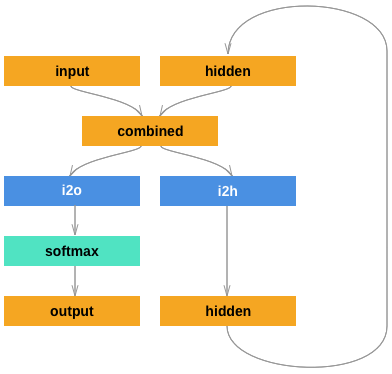

In [36]:
import torch.nn as nn

class multiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(multiRNN, self).__init__()

        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        
        self.i2h2 = nn.Linear(hidden_size, hidden_size)
        self.i2o2 = nn.Linear(output_size, output_size)
        
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
#         print("combined", combined.size())
        hidden = self.i2h(combined)        
        output = self.i2o(combined)
        hidden = self.i2h2(hidden)
        output = self.i2o2(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128

In [37]:
m = nn.Linear(20, 30)

In [38]:
#n_letters = 57
#n_hidden = 128
rnn = multiRNN(n_letters, n_hidden, n_categories)

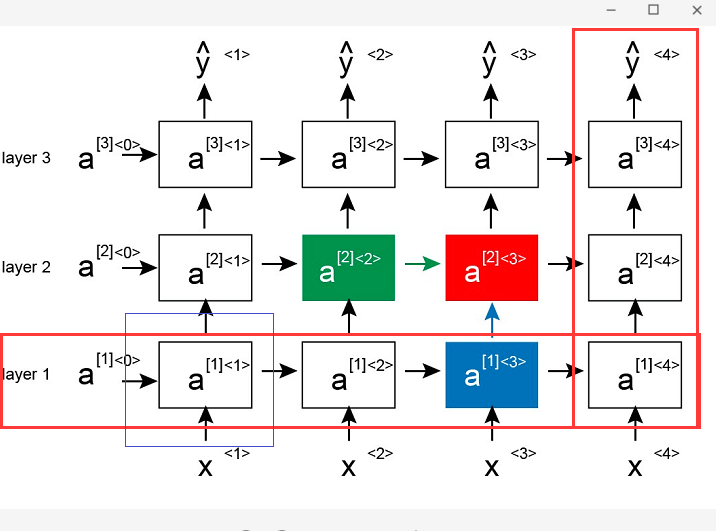

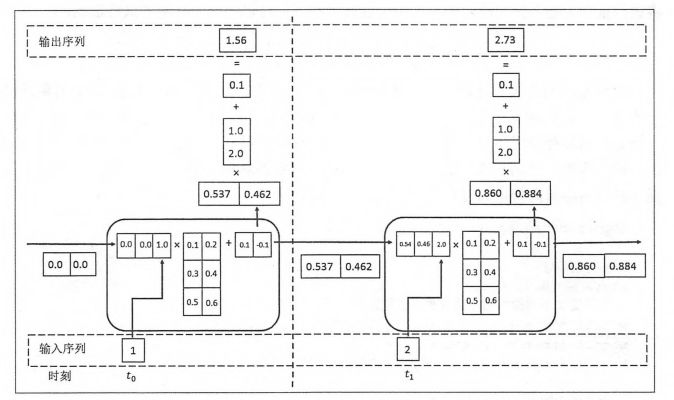

In [39]:
input = line_to_tensor('Albert')
print(input.size())
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)
print(output.size())

torch.Size([6, 1, 57])
tensor([[-2.9420, -2.9645, -2.8938, -2.8867, -3.0378, -2.9929, -2.9170, -2.7082,
         -2.9702, -2.7455, -2.9843, -3.0152, -2.8266, -2.6937, -2.8032, -2.8422,
         -2.8487, -3.0599]], grad_fn=<LogSoftmaxBackward>)
torch.Size([1, 18])


In [40]:
import time
import math

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()

n_iters = 25000 # 这个数字你可以调大一些
print_every = 500
plot_every = 100


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0


13
500 2% (0m 1s) 3.0284 Lawniczak / Portuguese ✗ (Polish)
15
1000 4% (0m 2s) 2.7772 Houtum / Dutch ✓
2
1500 6% (0m 3s) 2.9526 Chai / Arabic ✗ (Chinese)
16
2000 8% (0m 4s) 2.7579 Park  / Korean ✓
1
2500 10% (0m 5s) 3.0298 Janicek / German ✗ (Czech)
1
3000 12% (0m 6s) 2.8120 Minnibaev / German ✗ (Russian)
12
3500 14% (0m 7s) 2.7692 Sugai / Italian ✗ (Japanese)
12
4000 16% (0m 8s) 2.4960 Benedetti / Italian ✓
11
4500 18% (0m 9s) 2.9331 Hawes / Greek ✗ (English)
2
5000 20% (0m 10s) 2.8526 Shon / Arabic ✗ (Korean)
12
5500 22% (0m 11s) 2.9017 Elcock / Italian ✗ (English)
11
6000 24% (0m 12s) 1.8830 Demarchis / Greek ✓
3
6500 26% (0m 14s) 2.8170 Herrera / Japanese ✗ (Spanish)
11
7000 28% (0m 15s) 1.4035 Adamidis / Greek ✓
9
7500 30% (0m 16s) 2.9532 Cerney / English ✗ (Czech)
5
8000 32% (0m 17s) 2.5755 Chu / Vietnamese ✓
9
8500 34% (0m 18s) 2.6359 Soucy / English ✗ (French)
12
9000 36% (0m 19s) 3.0150 Abadi / Italian ✗ (Arabic)
9
9500 38% (0m 20s) 2.9393 Silje / English ✗ (Dutch)
1
10000 40% 

In [41]:
plt.plot(all_losses)

In [42]:
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(line_to_tensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.86) Russian
(-1.92) Polish
(-2.01) Scottish

> Jackson
(-1.39) Scottish
(-1.66) English
(-1.80) Irish

> Satoshi
(-0.64) Japanese
(-1.53) Italian
(-2.29) Polish


# 2. 将原始的RNN模型改成nn.LSTM和nn.GRU， 并且改变 `n_iters = 1000 ` 这个值，观察其变化

## LSTM

In [43]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers=1
        )
#         self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)       
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):   
        output,hidden = self.lstm(input,hidden)
        output = self.output(output[:,-1,:])
        output = self.softmax(output)
        return output, hidden

    def initHidden(self, batch_size):
#         return torch.zeros(1, self.hidden_size)
        
    
    
        
        return (torch.rand(1,batch_size,self.hidden_size),
            torch.rand(1,batch_size,self.hidden_size))
#         return torch.rand(1,batch_size,self.hidden_size)
                    


n_hidden = 128

In [44]:
lstm = LSTM(n_letters, n_hidden, n_categories)

In [45]:
#测试LSTM
input = line_to_tensor('Albert')
hidden = lstm.initHidden(input.size(1))
print("input.size:", input.size())
print("input.size(1):", input.size(1))
print("hidden:",hidden)
output, next_hidden = lstm(input[0].reshape(-1,1,57),hidden)
print(output)
print(output.size())

input.size: torch.Size([6, 1, 57])
input.size(1): 1
hidden: (tensor([[[0.4992, 0.5348, 0.9448, 0.6685, 0.0888, 0.3515, 0.4355, 0.1041,
          0.3243, 0.2942, 0.2352, 0.7705, 0.3835, 0.8411, 0.2235, 0.5022,
          0.6835, 0.1786, 0.4302, 0.3432, 0.6253, 0.6860, 0.8828, 0.0765,
          0.4169, 0.7044, 0.7864, 0.6442, 0.7181, 0.1837, 0.8049, 0.2851,
          0.5440, 0.7707, 0.1689, 0.8576, 0.6081, 0.4398, 0.0543, 0.6043,
          0.4527, 0.0972, 0.3088, 0.9093, 0.5357, 0.3960, 0.5188, 0.2122,
          0.8009, 0.7934, 0.6754, 0.0437, 0.8218, 0.5845, 0.3336, 0.1170,
          0.8315, 0.8773, 0.6209, 0.8325, 0.3932, 0.0514, 0.2053, 0.8576,
          0.5315, 0.0866, 0.9293, 0.3728, 0.8351, 0.6212, 0.8634, 0.6376,
          0.2141, 0.5234, 0.7301, 0.5286, 0.1103, 0.7380, 0.9730, 0.9021,
          0.8670, 0.2969, 0.6142, 0.8254, 0.7132, 0.2885, 0.3021, 0.5687,
          0.1413, 0.4252, 0.6286, 0.9470, 0.8933, 0.8486, 0.7434, 0.1962,
          0.4765, 0.6381, 0.2319, 0.2035, 0.1248, 0

In [46]:
input[0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [47]:
criterion = nn.CrossEntropyLoss()

In [48]:
import time
import math

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn
def train(category_tensor, line_tensor):
    hidden = lstm.initHidden(line_tensor.size(1))

    lstm.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = lstm(line_tensor[i].reshape(-1,1,57), hidden)
#         rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in lstm.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()

n_iters = 100000 # 这个数字你可以调大一些
print_every = 500
plot_every = 100


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0


15
500 0% (0m 2s) 2.8390 Flater / Dutch ✗ (German)
15
1000 1% (0m 4s) 2.9254 French / Dutch ✗ (English)
13
1500 1% (0m 6s) 2.8461 Oorschot / Portuguese ✗ (Dutch)
13
2000 2% (0m 8s) 2.9466 Munro / Portuguese ✗ (Scottish)
4
2500 2% (0m 11s) 2.7246 Loh / Chinese ✓
13
3000 3% (0m 13s) 2.9052 Shim / Portuguese ✗ (Korean)
4
3500 3% (0m 15s) 2.8143 Tong / Chinese ✗ (Vietnamese)
8
4000 4% (0m 17s) 2.8949 Jensen / Irish ✗ (English)
6
4500 4% (0m 20s) 2.7241 Jaskolski / Russian ✗ (Polish)
0
5000 5% (0m 22s) 2.8570 Hiraki / Czech ✗ (Japanese)
5
5500 5% (0m 24s) 2.9852 Beek / Vietnamese ✗ (Dutch)
8
6000 6% (0m 26s) 2.8492 Simoes / Irish ✗ (Portuguese)
7
6500 6% (0m 29s) 2.8328 Hautum / French ✗ (Dutch)
11
7000 7% (0m 31s) 3.0143 Zamorano / Greek ✗ (Spanish)
11
7500 7% (0m 33s) 2.7769 Shamarin / Greek ✗ (Russian)
16
8000 8% (0m 35s) 3.1630 Rios / Korean ✗ (Portuguese)
11
8500 8% (0m 37s) 2.0773 Kotsiopoulos / Greek ✓
16
9000 9% (0m 39s) 1.3731 She / Korean ✗ (Chinese)
14
9500 9% (0m 42s) 3.0063 Mck

9
77000 77% (5m 36s) 2.4647 Holodny / English ✗ (Russian)
2
77500 77% (5m 38s) 0.4483 Masih / Arabic ✓
11
78000 78% (5m 40s) 0.8625 Chellos / Greek ✓
5
78500 78% (5m 43s) 1.5434 Chi / Vietnamese ✗ (Korean)
15
79000 79% (5m 45s) 1.2733 Penders / Dutch ✓
5
79500 79% (5m 47s) 1.3215 Ha / Vietnamese ✗ (Korean)
13
80000 80% (5m 49s) 0.7892 Mateus / Portuguese ✓
4
80500 80% (5m 52s) 0.8392 Cui / Chinese ✓
2
81000 81% (5m 54s) 2.5464 Faust / Arabic ✗ (German)
9
81500 81% (5m 56s) 2.2005 Boyle / English ✗ (Scottish)
4
82000 82% (5m 58s) 0.7221 Ang / Chinese ✓
4
82500 82% (6m 0s) 1.1868 Duong / Chinese ✗ (Vietnamese)
17
83000 83% (6m 2s) 0.3648 Filipowski / Polish ✓
13
83500 83% (6m 4s) 3.5834 Squires / Portuguese ✗ (English)
17
84000 84% (6m 7s) 0.1229 Jaskolski / Polish ✓
7
84500 84% (6m 9s) 1.6932 Maille / French ✗ (Irish)
11
85000 85% (6m 11s) 0.4010 Horiatis / Greek ✓
8
85500 85% (6m 13s) 1.9585 Cunningham / Irish ✗ (Scottish)
14
86000 86% (6m 16s) 1.6320 Paton / Scottish ✗ (English)
8
865

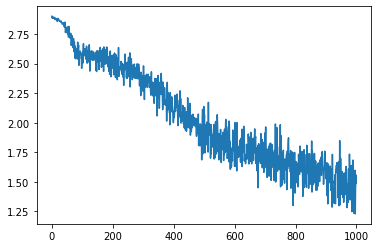

In [49]:
plt.plot(all_losses)

## GRU

In [50]:
import torch.nn as nn

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size
        
        self.gru = nn.GRU(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers=1
        )
#         self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)       
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):   
        output,hidden = self.gru(input,hidden)
        output = self.output(output[:,-1,:])
        output = self.softmax(output)
        return output, hidden

    def initHidden(self, batch_size):
#         return torch.zeros(1, self.hidden_size)
        return torch.rand(1,batch_size,self.hidden_size)


n_hidden = 128

In [51]:
gru = GRU(n_letters, n_hidden, n_categories)

In [52]:
#测试GRU
input = line_to_tensor('Albert')
hidden = gru.initHidden(input.size(1))
print("input.size:", input.size())
print("input.size(1):", input.size(1))
print("hidden:",hidden)
output, next_hidden = gru(input[0].reshape(-1,1,57),hidden)
print(output)
print(output.size())

input.size: torch.Size([6, 1, 57])
input.size(1): 1
hidden: tensor([[[0.5144, 0.2319, 0.6851, 0.7090, 0.9246, 0.2666, 0.4500, 0.1974,
          0.4965, 0.0657, 0.6452, 0.9452, 0.1522, 0.3742, 0.5268, 0.4423,
          0.2324, 0.4558, 0.4701, 0.9277, 0.1834, 0.1196, 0.3063, 0.7453,
          0.9469, 0.5067, 0.9233, 0.7713, 0.5949, 0.2372, 0.1143, 0.1905,
          0.6709, 0.9014, 0.6697, 0.3632, 0.7764, 0.8575, 0.6667, 0.5740,
          0.9584, 0.5140, 0.9629, 0.9579, 0.2075, 0.2551, 0.0978, 0.5207,
          0.7724, 0.8321, 0.4211, 0.7595, 0.8470, 0.1882, 0.9617, 0.7607,
          0.4078, 0.7313, 0.3199, 0.5032, 0.8451, 0.5852, 0.2227, 0.3353,
          0.4333, 0.3173, 0.8288, 0.4614, 0.6391, 0.1262, 0.8410, 0.9046,
          0.5727, 0.7770, 0.3066, 0.6939, 0.6023, 0.1813, 0.1389, 0.9279,
          0.9731, 0.3052, 0.1086, 0.7169, 0.9302, 0.7077, 0.9207, 0.8552,
          0.9974, 0.0336, 0.2569, 0.7002, 0.0431, 0.0423, 0.7072, 0.7516,
          0.0574, 0.3154, 0.0943, 0.4523, 0.8107, 0.

In [53]:
import time
import math

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn
def train(category_tensor, line_tensor):
    hidden = gru.initHidden(line_tensor.size(1))

    gru.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = gru(line_tensor[i].reshape(-1,1,57), hidden)
#         rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in gru.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()

n_iters = 100000 # 这个数字你可以调大一些
print_every = 500
plot_every = 100


# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = sample_trainning()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = category_from_output(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0


5
500 0% (0m 2s) 2.9483 Yudin / Vietnamese ✗ (Russian)
5
1000 1% (0m 4s) 2.9000 Budny / Vietnamese ✗ (Polish)
13
1500 1% (0m 6s) 2.8452 Sakelaris / Portuguese ✗ (Greek)
13
2000 2% (0m 8s) 2.8640 Sleiman / Portuguese ✗ (Arabic)
5
2500 2% (0m 10s) 2.7397 Nguyen / Vietnamese ✓
5
3000 3% (0m 12s) 2.8627 Stock / Vietnamese ✗ (English)
11
3500 3% (0m 14s) 2.7713 Vlasek / Greek ✗ (Czech)
13
4000 4% (0m 16s) 2.8289 Pesek / Portuguese ✗ (Czech)
11
4500 4% (0m 18s) 2.7152 Meeuwis / Greek ✗ (Dutch)
16
5000 5% (0m 20s) 2.7116 Toma / Korean ✗ (Arabic)
11
5500 5% (0m 22s) 2.5311 Jalamov / Greek ✗ (Russian)
16
6000 6% (0m 24s) 1.6387 Doan / Korean ✗ (Vietnamese)
11
6500 6% (0m 26s) 2.7915 Slootmaekers / Greek ✗ (Dutch)
6
7000 7% (0m 28s) 2.7953 Charron / Russian ✗ (French)
6
7500 7% (0m 30s) 2.5626 Janowski / Russian ✗ (Polish)
1
8000 8% (0m 32s) 2.6236 Frazer / German ✗ (English)
2
8500 8% (0m 34s) 2.7282 Devin / Arabic ✗ (Irish)
11
9000 9% (0m 36s) 1.5974 Eliopoulos / Greek ✓
11
9500 9% (0m 38s) 1.

13
78000 78% (5m 15s) 2.1259 Hayes / Portuguese ✗ (English)
1
78500 78% (5m 17s) 1.5850 Friedrich / German ✓
14
79000 79% (5m 19s) 1.7599 Bertrand / Scottish ✗ (French)
17
79500 79% (5m 21s) 1.6908 Mendoza / Polish ✗ (Spanish)
10
80000 80% (5m 23s) 0.8167 Alvarado / Spanish ✓
2
80500 80% (5m 25s) 0.2599 Hadad / Arabic ✓
5
81000 81% (5m 27s) 0.9594 Lam / Vietnamese ✓
16
81500 81% (5m 29s) 0.2958 Ho / Korean ✓
9
82000 82% (5m 31s) 2.3407 Oborny / English ✗ (Czech)
8
82500 82% (5m 33s) 2.6202 Michel / Irish ✗ (French)
17
83000 83% (5m 35s) 0.7270 Stanek / Polish ✓
7
83500 83% (5m 37s) 1.9963 Pugliese / French ✗ (Italian)
6
84000 84% (5m 39s) 0.0401 Dakhaev / Russian ✓
17
84500 84% (5m 41s) 0.4856 Smolak / Polish ✓
8
85000 85% (5m 43s) 0.5493 O'Kane / Irish ✓
2
85500 85% (5m 45s) 2.3862 Harin / Arabic ✗ (Russian)
3
86000 86% (5m 47s) 1.7291 Como / Japanese ✗ (Italian)
1
86500 86% (5m 49s) 2.4393 Bruckner / German ✗ (Czech)
6
87000 87% (5m 51s) 3.8087 Kubin / Russian ✗ (Czech)
17
87500 87% 

In [54]:
plt.plot(all_losses)

### GRU相比于LSTM，在训练参数没有变动的情况下，收敛速度快于LSTM

### 3. 把该RNN模型变成多层RNN模型，观察Loss的变化

In [128]:
class MULTI_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=3):
        super(MULTI_RNN,self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_szie = output_size
        self.n_layers = n_layers
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, input_size)
        self.o2o = nn.Linear(input_size, output_size)
        self.softmax = nn.Softmax(dim = 1)
    def forward(self, input, hiddens):
        hidden_new = torch.zeros(self.n_layers, 1, self.hidden_size)
        for i in range(self.n_layers):
            hidden = hiddens[i]
            combined = torch.cat((input,hidden), 1)
            hidden = self.i2h(combined)
            input = self.i2o(combined)
            hidden_new[i] = hidden
        output = self.o2o(input)
        output = self.softmax(output)
        return output, hidden_new
    def initHidden(self):
        return torch.zeros(self.n_layers, 1, self.hidden_size)

multi_rnn = MULTI_RNN(n_letters, n_hidden, n_categories)

# 训练
def train_multi_rnn(category_tensor, line_tensor,learning_rate = 0.005,
                    criterion = nn.CrossEntropyLoss(),
                    your_rnn = multi_rnn):
    hiddens = your_rnn.initHidden()

    your_rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hiddens = your_rnn(line_tensor[i], hiddens)
    loss = criterion(output, category_tensor)
    loss.backward()
    
    # Add parameters' gradients to their values, multiplied by learning rate
    for p in multi_rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()
# loss图
def plot_loss_mrnn(n_iter = 1000, plot_every = 100, 
                   give_criterion = nn.CrossEntropyLoss(), 
                   give_rnn = multi_rnn):
    current_loss = 0
    losses = []
    for iter in range(1, n_iter+1):
        category, line, category_tensor, line_tensor = sample_trainning()
        output, loss = train_multi_rnn(category_tensor, line_tensor,
                                       criterion = give_criterion,
                                       your_rnn = give_rnn)
        current_loss += loss
        
        if iter%plot_every == 0:
            losses.append(current_loss/iter)
            current_loss = 0
    plt.plot(losses)
    
plot_loss_mrnn(n_iter = 10000)

### 4. Pytorch里边常用nn.NLLoss来代替crossentropy，将criterion改为nn.NLLoss，观察变化

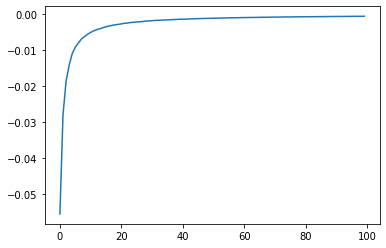

In [133]:
plot_loss_mrnn(n_iter = 10000, plot_every = 100, give_criterion = nn.NLLLoss(), give_rnn =multi_rnn)

